## Imports, constants

In [16]:
import sys
from pathlib import Path

# Get the project root (1 level up from notebook)
project_root = Path.cwd().parent

# Add to sys.path if not already present
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import seaborn as sns

from Tools.constants import *
from Midterm.many_shapes import *
from Midterm.cost import *


In [17]:
# Givens
M = 3
gamma = gamma_air
P = P_sea  # Pa
T = 300  # K
L = 1  # m, depth into page

In [18]:
lowest_per_shape = {}

## Parabolas

Global min: a=0.0999, num_points=4, cost=1.52828e+07


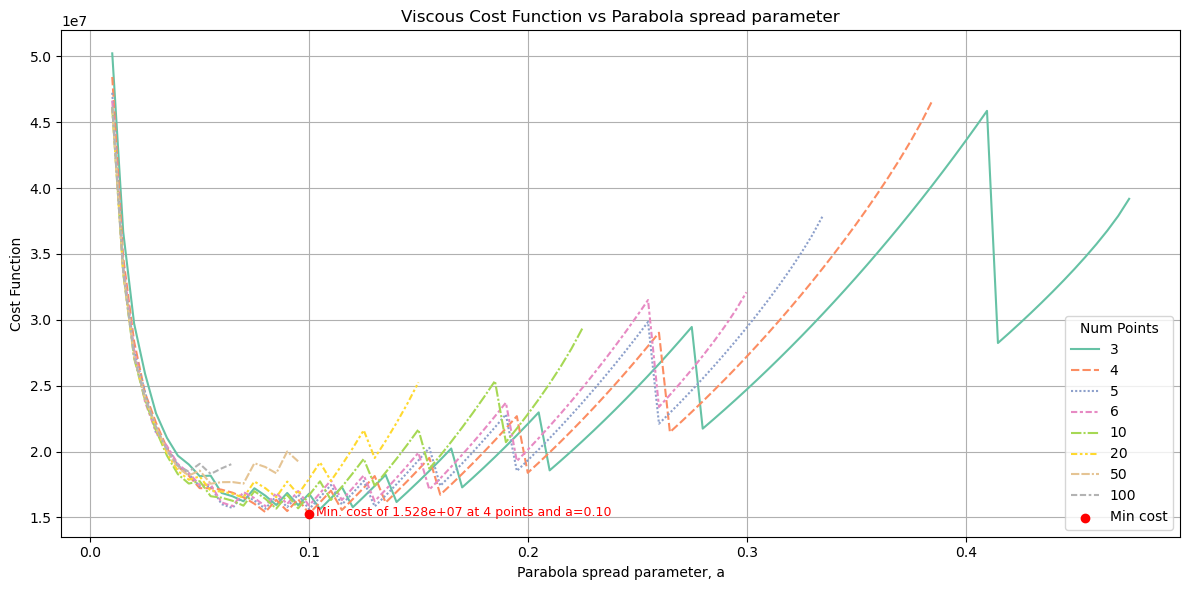

In [19]:
# Parameters to sweep
a_values = np.linspace(0.01, 5.0, 1000)
num_points = [3, 4, 5, 6, 10, 20, 50, 100]

# Collect results in a list of dictionaries
parabola_records = []
for num in num_points:
    for a in a_values:
        profile = generate_parabola_profile(a, num_points=num)
        N, D, cost = cost_function(profile['x'], profile['y_top'], profile['y_bot'], M, gamma, P, T, L, inviscid=False)
        parabola_records.append({
            "a": a,
            "num_points": num,
            "cost": cost,
            "N": N,
            "D": D
        })

# Convert to DataFrame
parabola_df = pd.DataFrame(parabola_records)

# global minimum
idx_min = parabola_df["cost"].idxmin()
a_star = parabola_df.loc[idx_min, "a"]
num_star = parabola_df.loc[idx_min, "num_points"]
cost_star_parabola = parabola_df.loc[idx_min, "cost"]
print(f"Global min: a={a_star:.4f}, num_points={num_star}, cost={cost_star_parabola:.6g}")

# plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=parabola_df, x="a", y="cost", hue="num_points", style="num_points", palette="Set2")
plt.scatter(a_star, cost_star_parabola, color="red", zorder=5, label="Min cost")

# corrected text placement
plt.annotate(
    f"Min. cost of {cost_star_parabola:.4g} at {num_star} points and a={a_star:.2f}",
    xy=(a_star, cost_star_parabola), xytext=(5, -4), textcoords="offset points",
    color="red", fontsize=9, ha="left", va="bottom"
)

plt.xlabel("Parabola spread parameter, a")
plt.ylabel("Cost Function")
plt.title("Viscous Cost Function vs Parabola spread parameter")
plt.grid(True)
plt.legend(title="Num Points", loc="best")
plt.tight_layout()
plt.show()

lowest_per_shape['parabola'] = {
    "a_star": a_star,
    "num_star": num_star,
    "cost_star": cost_star_parabola
}


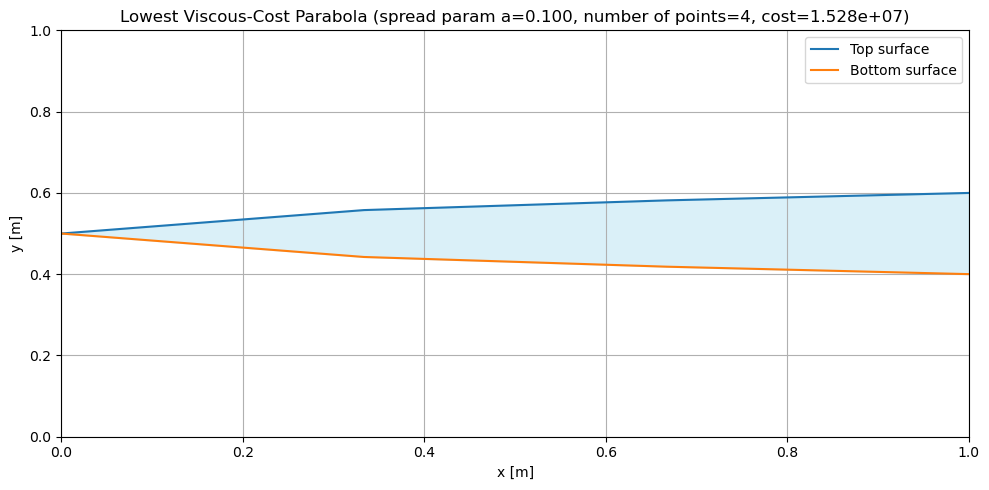

In [8]:
# plot the lowest-cost parabola shape
best_profile = generate_parabola_profile(a_star, num_points=num_star)

plt.figure(figsize=(10, 5))
plt.plot(best_profile["x"], best_profile["y_top"], label="Top surface")
plt.plot(best_profile["x"], best_profile["y_bot"], label="Bottom surface")
plt.fill_between(best_profile["x"], best_profile["y_bot"], best_profile["y_top"], color="skyblue", alpha=0.3)

plt.title(f"Lowest Viscous-Cost Parabola (spread param a={a_star:.3f}, number of points={num_star}, cost={cost_star_parabola:.4g})")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.ylim(0, 1)
plt.xlim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Triangles

Global min: half_angle=5.7362°, cost=1.79706e+07


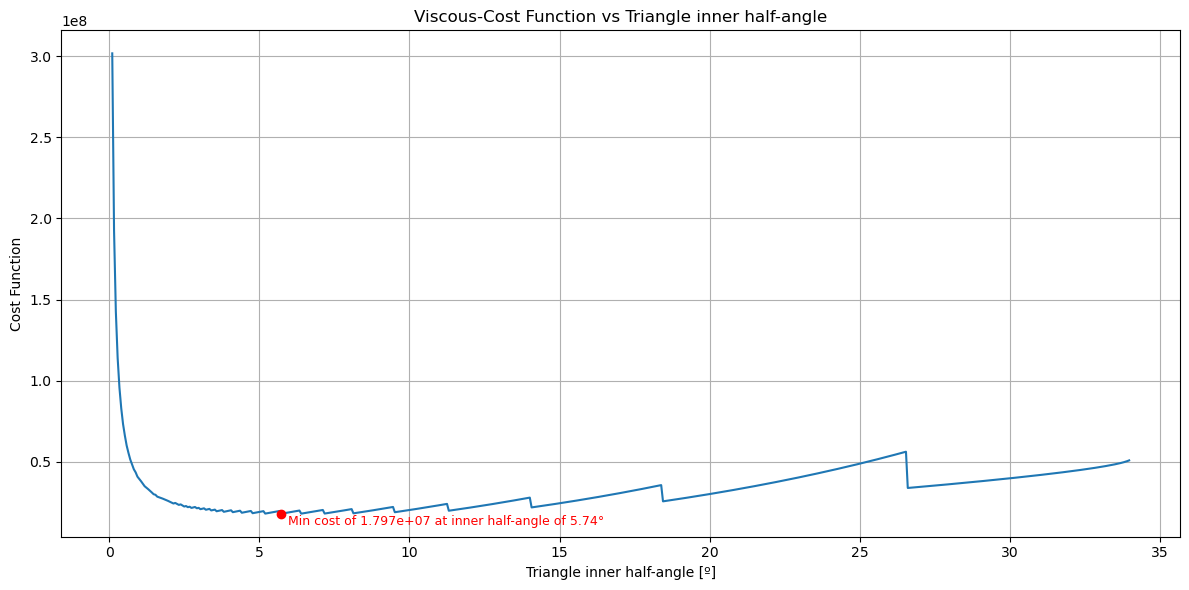

In [9]:
# Parameters to sweep
half_angle_values = np.linspace(0.1, 60, 1000) # degrees

# Collect results in a list of dictionaries
triangle_records = []
for half_angle in half_angle_values:
    profile = generate_triangle_profile(half_angle)
    N,D,cost = cost_function(profile['x'], profile['y_top'], profile['y_bot'], M, gamma, P, T, L, inviscid=False)
    triangle_records.append({
        "half_angle": half_angle,
        "cost": cost,
        "N": N,
        "D": D
        })

# Convert to DataFrame
triangle_df = pd.DataFrame(triangle_records)

# global minimum
idx_min = triangle_df["cost"].idxmin()
half_star = triangle_df.loc[idx_min, "half_angle"]
cost_star_triangle = triangle_df.loc[idx_min, "cost"]
print(f"Global min: half_angle={half_star:.4f}°, cost={cost_star_triangle:.6g}")

# plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=triangle_df, x="half_angle", y="cost", color="C0")
plt.scatter(half_star, cost_star_triangle, color="red", zorder=5, label="Min cost")
plt.annotate(
    # half_star, cost_star_triangle,
    f"Min cost of {cost_star_triangle:.4g} at inner half-angle of {half_star:.2f}° ",
    xy=(half_star, cost_star_triangle), xytext=(5, -10), textcoords="offset points",
    color="red", fontsize=9, ha="left", va="bottom",
    # color="red", fontsize=9,
    # ha="left", va="bottom"
)
plt.xlabel("Triangle inner half-angle [º]")
plt.ylabel("Cost Function")
plt.title("Viscous-Cost Function vs Triangle inner half-angle")
plt.grid(True)
plt.tight_layout()
plt.show()

lowest_per_shape['triangle'] = {
    "half_star": half_star,
    "cost_star": cost_star_triangle
}


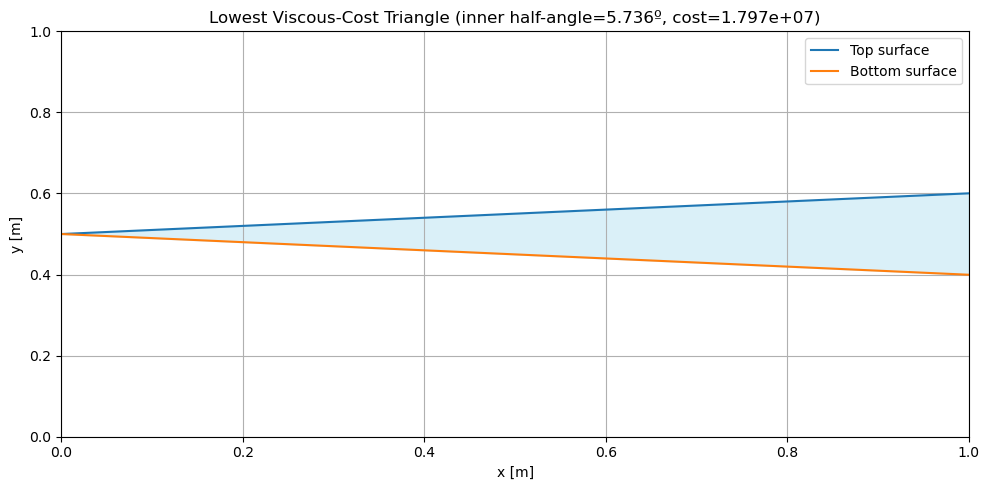

In [10]:
best_profile = generate_triangle_profile(half_star)

plt.figure(figsize=(10, 5))
plt.plot(best_profile["x"], best_profile["y_top"], label="Top surface")
plt.plot(best_profile["x"], best_profile["y_bot"], label="Bottom surface")
plt.fill_between(best_profile["x"], best_profile["y_bot"], best_profile["y_top"], color="skyblue", alpha=0.3)

plt.title(f"Lowest Viscous-Cost Triangle (inner half-angle={half_star:.3f}º, cost={cost_star_triangle:.4g})")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Triangular Wedge

In [11]:
# Parameters to sweep
half_angle_values = np.linspace(0.1, 40, 100)
base_height_values = np.linspace(0.1, 0.9, 100)

# Collect results in a list of dictionaries
t_wedge_records = []
for half_angle in half_angle_values:
    for base_height in base_height_values:
        profile = generate_triangular_wedge_profile(half_angle, base_height)
        N, D, cost = cost_function(profile['x'], profile['y_top'], profile['y_bot'], M, gamma, P, T, L, inviscid=False)
        t_wedge_records.append({
            "half_angle": half_angle,
            "base_height": base_height,
            "cost": cost,
            "N": N, 
            "D": D
        })


In [12]:
# Assume you end up with lists of equal length:
angles   = np.array([r["half_angle"] for r in t_wedge_records])
base_heights   = np.array([r["base_height"] for r in t_wedge_records])
costs     = np.array([r["cost"] for r in t_wedge_records])
Ns        = np.array([r["N"] for r in t_wedge_records])
Ds        = np.array([r["D"] for r in t_wedge_records])

Avals = np.unique(angles)          # 1000
BHvals = np.unique(base_heights)          # 1000
An, BHn = len(Avals), len(BHvals)

# Map (height, top_length) → grid indices
A_idx = np.searchsorted(Avals, angles)
BH_idx = np.searchsorted(BHvals, base_heights)

cost_grid = np.empty((An, BHn)); cost_grid[:] = np.nan
N_grid    = np.empty((An, BHn)); N_grid[:]    = np.nan
D_grid    = np.empty((An, BHn)); D_grid[:]    = np.nan
cost_grid[A_idx, BH_idx] = costs
N_grid[A_idx, BH_idx]    = Ns
D_grid[A_idx, BH_idx]    = Ds


Global min: inner half angle=7.7576, base height=0.1323, cost=1.46614e+07


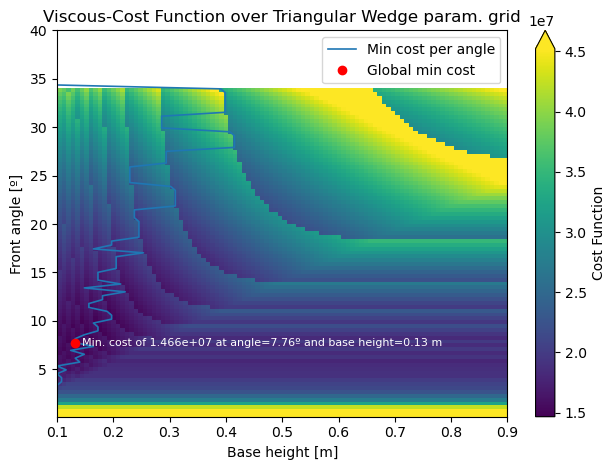

In [13]:
# per-height minima
best_j = np.nanargmin(cost_grid, axis=1)                 # j*(h)
best_BH = BHvals[best_j]                                   # top_length*(h)
best_C = cost_grid[np.arange(len(Avals)), best_j]        # C_min(h)

# global minimum
i_star, j_star = np.unravel_index(np.nanargmin(cost_grid), cost_grid.shape)
A_star, BH_star, cost_star_t_wedge = Avals[i_star], BHvals[j_star], cost_grid[i_star, j_star]
print(f"Global min: inner half angle={A_star:.4f}, base height={BH_star:.4f}, cost={cost_star_t_wedge:.6g}")

# plot
M = np.ma.masked_invalid(cost_grid)  
vals = cost_grid[np.isfinite(cost_grid)]
cap = np.nanpercentile(vals, 95)

fig, ax = plt.subplots()
im = ax.imshow(
    np.clip(M,None,cap),# cost_grid,
    origin="lower",
    extent=[BHvals.min(), BHvals.max(), Avals.min(), Avals.max()],
    aspect="auto",
    cmap="viridis"
)
cbar = plt.colorbar(im, ax=ax, extend="max")
cbar.set_label("Cost Function")

ax.plot(best_BH, Avals, linewidth=1.2, label="Min cost per angle")
ax.plot(BH_star, A_star, "ro", label="Global min cost")

# label the point
# ax.text(
#     BH_star, A_star,
#     f"({BH_star:.3f}, {A_star:.3f})\nC={cost_star_t_wedge:.4f}",
#     color="white", fontsize=8,
#     ha="left", va="bottom"
# )

plt.annotate(
    f"Min. cost of {cost_star_t_wedge:.4g} at angle={A_star:.2f}º and base height={BH_star:.2f} m",
    xy=(BH_star, A_star), xytext=(5, -4), textcoords="offset points",
    color="white", fontsize=8, ha="left", va="bottom"
)



ax.set_xlabel("Base height [m]")
ax.set_ylabel("Front angle [º]")
ax.set_title("Viscous-Cost Function over Triangular Wedge param. grid")
ax.legend()
plt.tight_layout()
plt.show()

lowest_per_shape['triangular_wedge'] = {
    "A_star": A_star,
    "BH_star": BH_star,
    "cost_star": cost_star_t_wedge
}


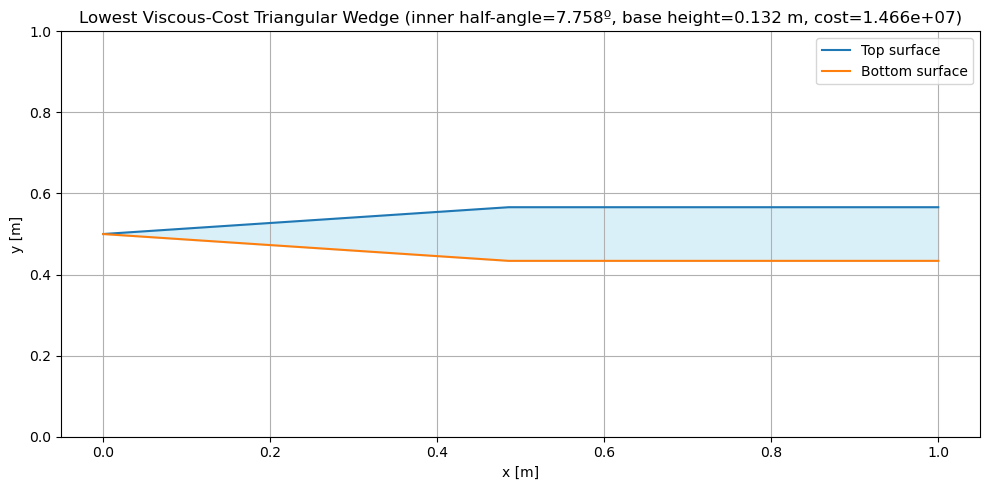

In [14]:
# plot the lowest-cost 
best_profile = generate_triangular_wedge_profile(A_star, BH_star)

plt.figure(figsize=(10, 5))
plt.plot(best_profile["x"], best_profile["y_top"], label="Top surface")
plt.plot(best_profile["x"], best_profile["y_bot"], label="Bottom surface")
plt.fill_between(best_profile["x"], best_profile["y_bot"], best_profile["y_top"], color="skyblue", alpha=0.3)

plt.title(f"Lowest Viscous-Cost Triangular Wedge (inner half-angle={A_star:.3f}º, base height={BH_star:.3f} m, cost={cost_star_t_wedge:.4g})")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Trapezoids

In [20]:
# Parameters to sweep
height_values = np.linspace(0.1, 0.9, 100)
top_length_values = np.linspace(0.1, 0.9, 100)

# Collect results in a list of dictionaries
trapezoid_records = []
for height in height_values:
    for top_length in top_length_values:
        profile = generate_trapezoid_profile(height, top_length)
        N, D, cost = cost_function(profile['x'], profile['y_top'], profile['y_bot'], M, gamma, P, T, L, inviscid=False)
        trapezoid_records.append({
            "height": height,
            "top_length": top_length,
            "cost": cost,
            "N": N, 
            "D": D
        })


In [21]:
# Assume you end up with lists of equal length:
heights   = np.array([r["height"] for r in trapezoid_records])
toplens   = np.array([r["top_length"] for r in trapezoid_records])
costs     = np.array([r["cost"] for r in trapezoid_records])
Ns        = np.array([r["N"] for r in trapezoid_records])
Ds        = np.array([r["D"] for r in trapezoid_records])

Hvals = np.unique(heights)          # 1000
Tvals = np.unique(toplens)          # 1000
Hn, Tn = len(Hvals), len(Tvals)

# Map (height, top_length) → grid indices
H_idx = np.searchsorted(Hvals, heights)
T_idx = np.searchsorted(Tvals, toplens)

cost_grid = np.empty((Hn, Tn)); cost_grid[:] = np.nan
N_grid    = np.empty((Hn, Tn)); N_grid[:]    = np.nan
D_grid    = np.empty((Hn, Tn)); D_grid[:]    = np.nan
cost_grid[H_idx, T_idx] = costs
N_grid[H_idx, T_idx]    = Ns
D_grid[H_idx, T_idx]    = Ds


Global min: height=0.1000, top_length=0.4313, cost=1.89814e+07


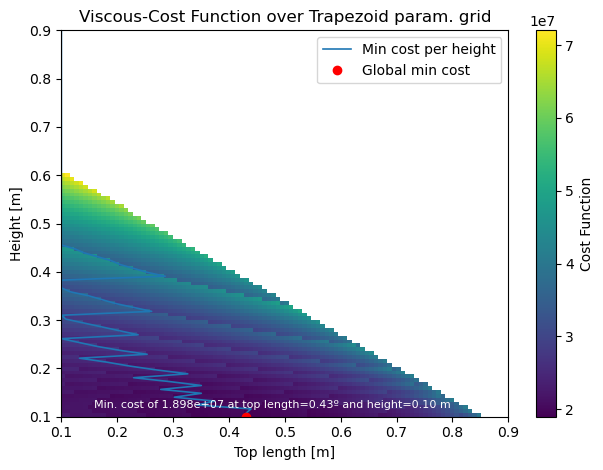

In [23]:
# per-height minima
best_j = np.nanargmin(cost_grid, axis=1)                 # j*(h)
best_T = Tvals[best_j]                                   # top_length*(h)
best_C = cost_grid[np.arange(len(Hvals)), best_j]        # C_min(h)

# global minimum
i_star, j_star = np.unravel_index(np.nanargmin(cost_grid), cost_grid.shape)
H_star, T_star, cost_star_trapezoid = Hvals[i_star], Tvals[j_star], cost_grid[i_star, j_star]
print(f"Global min: height={H_star:.4f}, top_length={T_star:.4f}, cost={cost_star_trapezoid:.6g}")

# plot
fig, ax = plt.subplots()
im = ax.imshow(
    cost_grid,
    origin="lower",
    extent=[Tvals.min(), Tvals.max(), Hvals.min(), Hvals.max()],
    aspect="auto",
    cmap="viridis"
)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Cost Function")

ax.plot(best_T, Hvals, linewidth=1.2, label="Min cost per height")
ax.plot(T_star, H_star, "ro", label="Global min cost")

# label the point
# ax.text(
#     T_star, H_star,
#     f"({T_star:.3f}, {H_star:.3f})\nC={cost_star_trapezoid:.4f}",
#     color="white", fontsize=8,
#     ha="left", va="bottom"
# )

plt.annotate(
    f"Min. cost of {cost_star_trapezoid:.4g} at top length={T_star:.2f}º and height={H_star:.2f} m",
    xy=(T_star, H_star), xytext=(-110, 5), textcoords="offset points",
    color="white", fontsize=8, ha="left", va="bottom"
)



ax.set_xlabel("Top length [m]")
ax.set_ylabel("Height [m]")
ax.set_title("Viscous-Cost Function over Trapezoid param. grid")
ax.legend()
plt.tight_layout()
plt.show()

lowest_per_shape['trapezoid'] = {
    "H_star": H_star,
    "T_star": T_star,
    "cost_star": cost_star_trapezoid
}


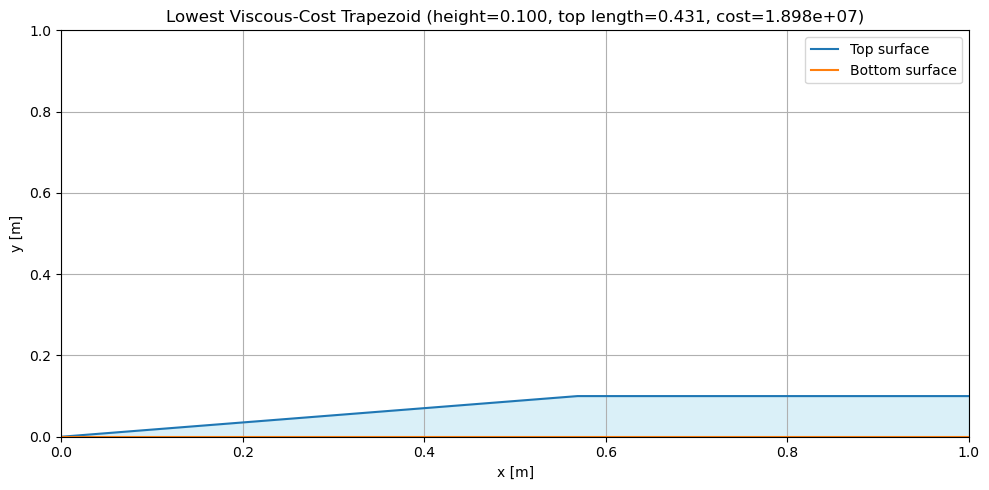

In [24]:
# plot the lowest-cost 
best_profile = generate_trapezoid_profile(H_star, T_star)

plt.figure(figsize=(10, 5))
plt.plot(best_profile["x"], best_profile["y_top"], label="Top surface")
plt.plot(best_profile["x"], best_profile["y_bot"], label="Bottom surface")
plt.fill_between(best_profile["x"], best_profile["y_bot"], best_profile["y_top"], color="skyblue", alpha=0.3)

plt.title(f"Lowest Viscous-Cost Trapezoid (height={H_star:.3f}, top length={T_star:.3f}, cost={cost_star_trapezoid:.4g})")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.ylim(0, 1)
plt.xlim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Power Series

Global min: base_height=0.1061, num_points=5, cost=1.56138e+07


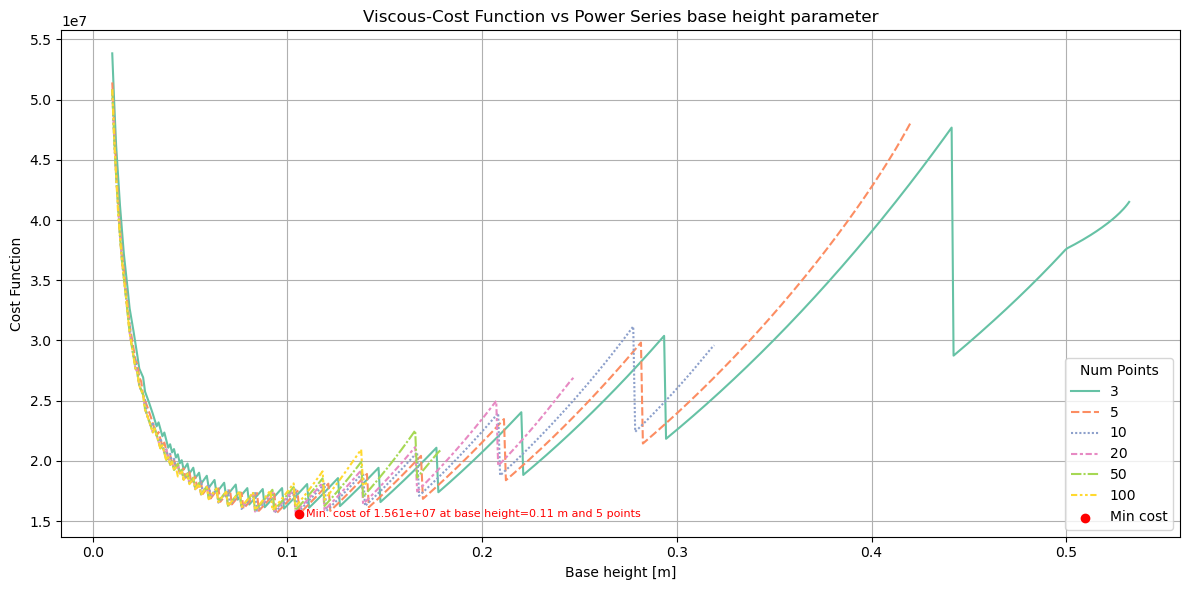

In [25]:
# Parameters to sweep
base_height_values = np.linspace(0.01, 1.0, 1000)
num_points = [3, 5, 10, 20, 50, 100]

# Collect results in a list of dictionaries
power_records = []
for num in num_points:
    for base_height in base_height_values:
        profile = generate_power_series_profile(base_height, num_points=num)
        N, D, cost = cost_function(profile['x'], profile['y_top'], profile['y_bot'], M, gamma, P, T, L, inviscid=False)
        power_records.append({
            "base_height": base_height,
            "num_points": num,
            "cost": cost,
            "N": N,
            "D": D
        })

# Convert to DataFrame
power_df = pd.DataFrame(power_records)

# global minimum
idx_min = power_df["cost"].idxmin()
base_height_star = power_df.loc[idx_min, "base_height"]
num_star = power_df.loc[idx_min, "num_points"]
cost_star_power = power_df.loc[idx_min, "cost"]
print(f"Global min: base_height={base_height_star:.4f}, num_points={num_star}, cost={cost_star_power:.6g}")

# plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=power_df, x="base_height", y="cost", hue="num_points", style="num_points", palette="Set2")
plt.scatter(base_height_star, cost_star_power, color="red", zorder=5, label="Min cost")

# plt.annotate(
#     f"({base_height_star:.2f}, {cost_star_power:.4g}) at num_points={num_star}",
#     xy=(base_height_star, cost_star_power), xytext=(5, 5), textcoords="offset points",
#     color="red", fontsize=9, ha="left", va="bottom"
# )

plt.annotate(
    f"Min. cost of {cost_star_power:.4g} at base height={base_height_star:.2f} m and {num_star} points",
    xy=(base_height_star, cost_star_power), xytext=(5, -4), textcoords="offset points",
    color="red", fontsize=8, ha="left", va="bottom"
)


plt.xlabel("Base height [m]")
plt.ylabel("Cost Function")
plt.title("Viscous-Cost Function vs Power Series base height parameter")
plt.grid(True)
plt.legend(title="Num Points", loc="best")
plt.tight_layout()
plt.show()

lowest_per_shape['power'] = {
    "base_height": base_height_star,
    "num_star": num_star,
    "cost_star": cost_star_power
}


In [ ]:
best_profile = generate_power_series_profile(base_height_star, num_star)

plt.figure(figsize=(10, 5))
plt.plot(best_profile["x"], best_profile["y_top"], label="Top surface")
plt.plot(best_profile["x"], best_profile["y_bot"], label="Bottom surface")
plt.fill_between(best_profile["x"], best_profile["y_bot"], best_profile["y_top"], color="skyblue", alpha=0.3)

plt.title(f"Lowest Viscous-Cost Power Series (base height={base_height_star:.3f}, number of points={num_star}, cost={cost_star_power:.4g})")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.ylim(0, 1)
plt.xlim(0,1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Diamond-ish

In [ ]:
# Parameters to sweep
base_height_values = np.linspace(0.1, 1.0, 100)
slope_values = np.linspace(0.1, 0.75, 100)

# Collect results in a list of dictionaries
diamond_records = []
for height in base_height_values:
    for slope in slope_values:
        profile = generate_diamond_ish_profile(height, slope)
        N, D, cost = cost_function(profile['x'], profile['y_top'], profile['y_bot'], M, gamma, P, T, L, inviscid=False)
        diamond_records.append({
            "base_height": height,
            "slope": slope,
            "cost": cost,
            "N": N, 
            "D": D
        })


In [ ]:
# Assume you end up with lists of equal length:
bheights   = np.array([r["base_height"] for r in diamond_records])
slopes   = np.array([r["slope"] for r in diamond_records])
costs     = np.array([r["cost"] for r in diamond_records])
Ns        = np.array([r["N"] for r in diamond_records])
Ds        = np.array([r["D"] for r in diamond_records])

BHvals = np.unique(bheights)          # 1000
Svals = np.unique(slopes)          # 1000
BHn, Sn = len(BHvals), len(Svals)

# Map (height, top_length) → grid indices
BH_idx = np.searchsorted(BHvals, bheights)
S_idx = np.searchsorted(Svals, slopes)

cost_grid = np.empty((BHn, Sn)); cost_grid[:] = np.nan
N_grid    = np.empty((BHn, Sn)); N_grid[:]    = np.nan
D_grid    = np.empty((BHn, Sn)); D_grid[:]    = np.nan
cost_grid[BH_idx, S_idx] = costs
N_grid[BH_idx, S_idx]    = Ns
D_grid[BH_idx, S_idx]    = Ds


In [ ]:
# per-height minima
best_j = np.nanargmin(cost_grid, axis=1)                 
best_S = Svals[best_j]                                   
best_C = cost_grid[np.arange(len(BHvals)), best_j]        

# global minimum
i_star, j_star = np.unravel_index(np.nanargmin(cost_grid), cost_grid.shape)
BH_star, S_star, cost_star_diamond = BHvals[i_star], Svals[j_star], cost_grid[i_star, j_star]
print(f"Global min: base height={BH_star:.4f}, slope={S_star:.4f}, cost={cost_star_diamond:.6g}")

# finite stats
finite = np.isfinite(cost_grid)
vals = cost_grid[finite]
lo, hi = np.quantile(vals, [0.01, 0.99])   # pick window you like
norm = colors.Normalize(vmin=lo, vmax=hi, clip=True)

M = np.ma.masked_invalid(cost_grid)  
vals = cost_grid[np.isfinite(cost_grid)]
cap = np.nanpercentile(vals, 98)

# plot
fig, ax = plt.subplots()
im = ax.imshow(
    np.clip(M, None, cap),
    origin="lower",
    extent=[Svals.min(), Svals.max(), BHvals.min(), BHvals.max()],
    aspect="auto",
    cmap="viridis",
)
cbar = plt.colorbar(im, ax=ax, extend="max")
cbar.set_label("Cost Function")

ax.plot(best_S, BHvals, linewidth=1.2, label="Min cost per base height")
ax.plot(S_star, BH_star, "ro", label="Global min cost")

# # label the point
# ax.text(
#     S_star, BH_star,
#     f"({S_star:.3f}, {BH_star:.3f})\nC={cost_star_diamond:.4f}",
#     color="white", fontsize=8,
#     ha="left", va="bottom"
# )


plt.annotate(
    f"Min. cost of {cost_star_diamond:.4g} at slope={S_star:.2f} and base height={BH_star:.2f} m",
    xy=(S_star, BH_star), xytext=(5, -4), textcoords="offset points",
    color="white", fontsize=8, ha="left", va="bottom"
)


ax.set_xlabel("Slope")
ax.set_ylabel("Base Height [m]")
ax.set_title("Viscous-Cost Function over Diamond param. grid")
ax.legend()
plt.tight_layout()
plt.show()

lowest_per_shape['diamond'] = {
    "BH_star": BH_star,
    "S_star": S_star,
    "cost_star": cost_star_diamond
}


In [ ]:
# plot the lowest-cost 
best_profile = generate_diamond_ish_profile(BH_star, S_star)

plt.figure(figsize=(10, 5))
plt.plot(best_profile["x"], best_profile["y_top"], label="Top surface")
plt.plot(best_profile["x"], best_profile["y_bot"], label="Bottom surface")
plt.fill_between(best_profile["x"], best_profile["y_bot"], best_profile["y_top"], color="skyblue", alpha=0.3)

plt.title(f"Lowest Viscous-Cost Diamond (slope={S_star:.3f}, base height={BH_star:.3f} m, cost={cost_star_diamond:.4g})")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Get global lowest

In [ ]:
min_cost = np.inf
min_shape = None
for shape in lowest_per_shape:
    if shape["cost_star"] <= min_cost:
        min_cost = shape["cost_star"]
        min_shape = shape

print(min_shape)